---
WEEK 2 – EXPLORATORY DATA ANALYSIS (EDA)
* Author: [Developer #3]
* Task: Create a few visualizations or summary stats to understand trends in the cleaned dataset.


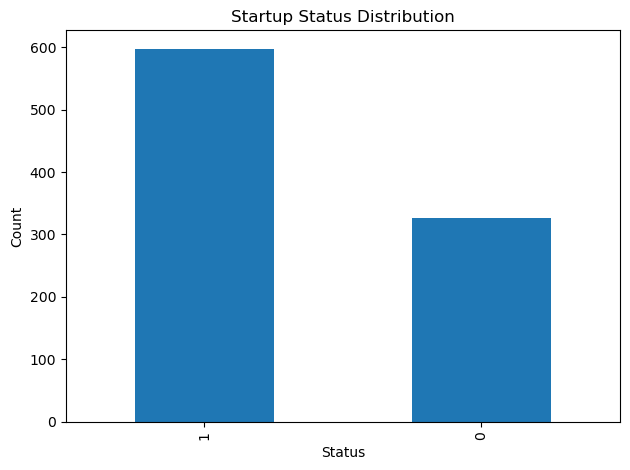

<Figure size 640x480 with 0 Axes>

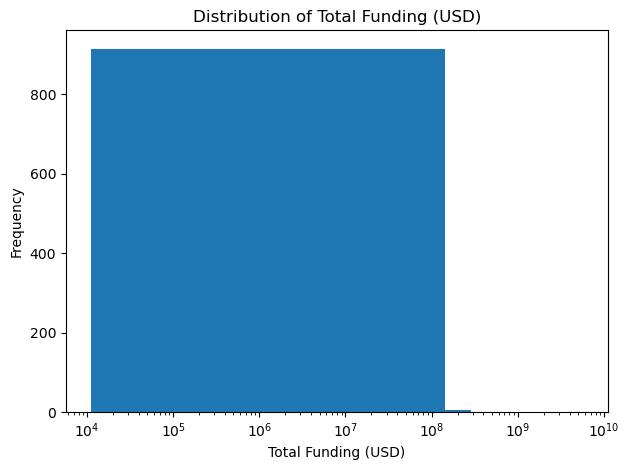

<Figure size 640x480 with 0 Axes>

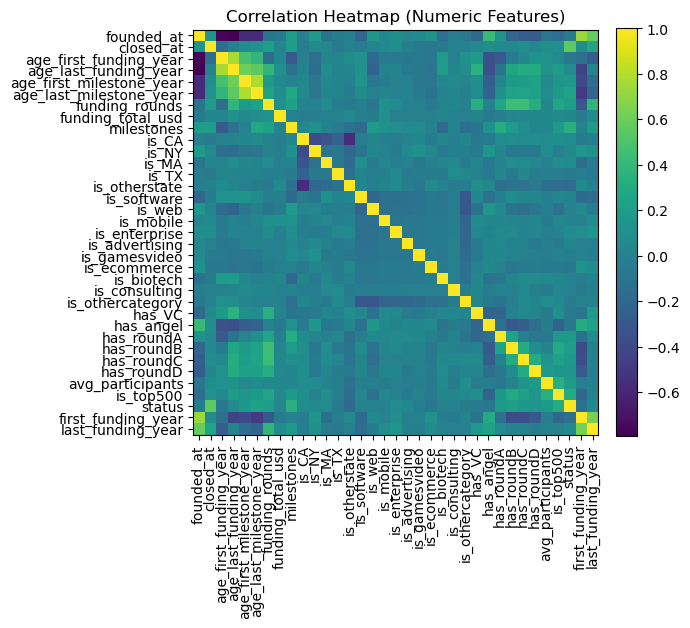

<Figure size 640x480 with 0 Axes>

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Where you're running this from:
# - If you're in project root: use these two lines as-is.
# - If you're inside scripts/: change data_path to Path("../data/processed/...") and docs_dir to Path("../docs")
data_path = Path("data/processed/startup_success_processed.csv")
docs_dir  = Path("docs")
docs_dir.mkdir(exist_ok=True)

df = pd.read_csv(data_path)

# 1) Status Distribution
plt.figure()
ax = df['status'].value_counts().plot(kind='bar')
plt.title("Startup Status Distribution")
plt.xlabel("Status"); plt.ylabel("Count")
plt.tight_layout()
plt.show()                              # show in notebook
plt.savefig(docs_dir / "status_distribution.png")

# 2) Funding Distribution (skewed → log x-axis helps)
plt.figure()
ax = df['funding_total_usd'].plot(kind='hist', bins=40)
plt.title("Distribution of Total Funding (USD)")
plt.xlabel("Total Funding (USD)"); plt.ylabel("Frequency")
plt.xscale('log')                       # optional but useful for long-tail
plt.tight_layout()
plt.show()
plt.savefig(docs_dir / "funding_histogram.png")

# 3) Correlation Heatmap (with labels)
numeric_df = df.select_dtypes(include=['float64','int64'])
corr = numeric_df.corr(numeric_only=True)

plt.figure(figsize=(7,7))
im = plt.imshow(corr, interpolation='nearest')
plt.title("Correlation Heatmap (Numeric Features)")
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.index)),   corr.index)
plt.tight_layout()
plt.show()
plt.savefig(docs_dir / "correlation_heatmap.png")
